In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [40]:
housing_price= pd.read_csv("Housing.csv")
housing_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [41]:
housing_price.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [42]:
len(housing_price)

545

In [43]:
from sklearn import preprocessing

In [44]:
int = preprocessing.LabelEncoder()

In [45]:
housing_price.mainroad=int.fit_transform(housing_price.mainroad)
housing_price.guestroom = int.fit_transform(housing_price.guestroom)
housing_price.basement = int.fit_transform(housing_price.basement)
housing_price.hotwaterheating = int.fit_transform(housing_price.hotwaterheating)
housing_price.airconditioning = int.fit_transform(housing_price.airconditioning)
housing_price.prefarea = int.fit_transform(housing_price.prefarea)
housing_price.furnishingstatus = int.fit_transform(housing_price.furnishingstatus)

In [46]:
X = housing_price.drop("price", axis=1)
y = housing_price.price

In [47]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [48]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

ValueError: Boolean array expected for the condition, not int64

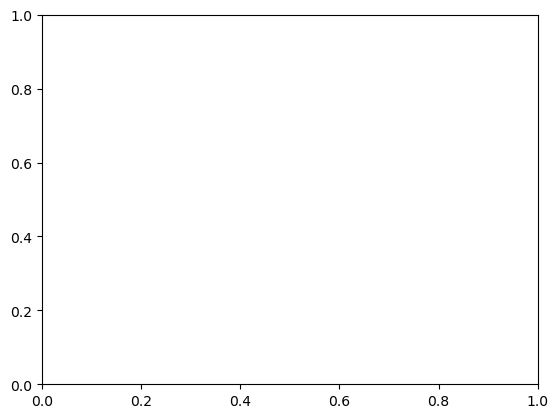

In [49]:
housing_price.plot(X , y , kind='scatter')
plt.title('Determining the Price of a House')
plt.xlabel('Features')
plt.ylabel('Prices')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X ,  y, test_size=0.2, random_state=42)

In [55]:
lr = LinearRegression().fit(X_train, y_train)
lr

LinearRegression()

In [56]:
lr.score(X_test, y_test)

0.6494754192267804

In [57]:
y_pred = lr.predict(X_test)

In [58]:
get_cv_scores(lr)

NameError: name 'get_cv_scores' is not defined

In [59]:
print(lr.intercept_)

293083.0691506695


In [62]:
print(lr.coef_)

[ 2.35848772e+02  7.85744924e+04  1.09711727e+06  4.06223164e+05
  3.66824192e+05  2.33146766e+05  3.93159779e+05  6.87881311e+05
  7.85550579e+05  2.25756514e+05  6.29901661e+05 -2.10397118e+05]


# Prediction

ValueError: x and y must be the same size

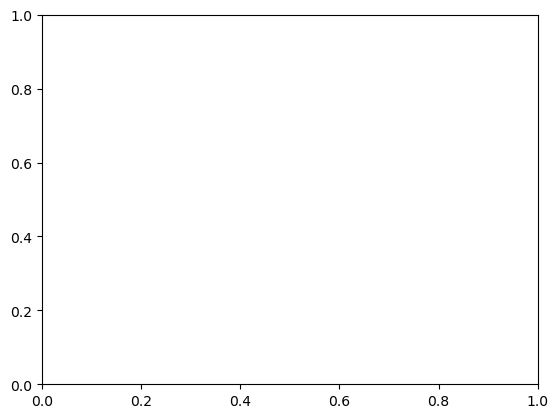

In [64]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.show();

In [65]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
316,4060000,5.203692e+06
77,6650000,7.257004e+06
360,3710000,3.062829e+06
90,6440000,4.559592e+06
493,2800000,3.332932e+06


# Evaluation

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 979679.6912959903
Mean Squared Error: 1771751116594.0344
Root Mean Squared Error: 1331071.4167895103
